In [ ]:
# Mount Google Drive
from google.colab import drive # import drive from google colab

ROOT = "/content/drive"     # default location for the drive
print(ROOT)                 # print content of ROOT (Optional)

drive.mount(ROOT)           # we mount the google drive at /content/drive

Mounted at /content/drive


In [ ]:
import os
os.chdir('/content/drive/MyDrive/Colab Notebooks/PRO_commentNLP')

In [ ]:
!pip install youtube-comment-scraper-python

In [ ]:
from youtube_comment_scraper_python import *

link = input("Youtube links: ")
saved = input("Output name: ")
youtube.open(link)

response = youtube.video_comments()
data = response['body']

df = pd.DataFrame(data)
df.to_csv(saved)

It currently works on windows only
It currently works on windows only
Youtube links: https://www.youtube.com/watch?v=HURvJDldVGA
Output name: test:comment.csv
It currently works on windows only
It currently works on windows only


TypeError: ignored

In [ ]:
import pandas as pd

data = pd.read_csv("ytb_comments_noah_kegan_make_money.csv")
data.head()

In [ ]:
# Keep only text columns and review score
data = data[['cid','text','time','author','votes']]
data.head(100)

,cid,text,time,author,votes
0,UgzDDofmjsNpc0_aCmx4AaABAg,Can we all just take a moment to appreciate ho...,1 年前,Roll with Rory,163
1,UgyAkXwpoWQvO-MmUu14AaABAg,"""What do most people have wrong about passive ...",1 年前,Pablo Gutierrez,111
2,Ugz-yeN0J6jqJNAhEF54AaABAg,"Really helpful, and great to hear someone bein...",1 年前,Susan Hill,4
3,UgyI589GoSuMqEPji294AaABAg,I love how transparent Noah is! He's talking a...,1 年前,Iconic Ape,11
4,UgxQRvgBmV70hGPTRxJ4AaABAg,"Thank you Noah, as always a super useful video...",1 年前,Bo Skitsko - Stay Sore Fitness,2
...,...,...,...,...,...
95,UgxH3PDvf4VKH7xK3kZ4AaABAg,Awesome video! Definitely got an idea!,1 年前,Jamir Broadnax,4
96,UgzEQKOAipO9rkYjFQF4AaABAg,“Whenever you find yourself doubting how far y...,1 年前,Sacda Abdurhman-Personal Growth,1
97,UgyfDO0V-hLXmhf0V294AaABAg,Great content as always,1 年前,Smooth,0
98,UgzbfCef623VJy4tYaB4AaABAg,Wow you the man! Brain and ideas are on fire r...,1 年前,Oskar Woehr,0


In [ ]:
data.shape

(320, 5)

In [ ]:
data.sort_values(by="cid")

,cid,text,time,author,votes
224,UggPcZhLgYaRpngCoAEC,He deserves an oscar for that scene,6 年前,Iggy Pips,28
232,UgggrFYeqS9I1ngCoAEC,"Press 2, and after he says, ""King Kong,"" quick...",7 年前,JonW1987,225
236,Uggpx7cJ2W2Gf3gCoAEC,My workout quote! lol,8 年前,Coach Rollie Workouts - Fat X 101,26
237,Uggr2NXGakx3engCoAEC,Godzilla's thoughts Exactly,5 年前,Plebdominus Rex,136
225,Ugh2u8tiYv78fXgCoAEC,The exact moment when Denzel Washington wins t...,5 年前,Alexander George,6
...,...,...,...,...,...
188,UgzwPVsPxzOIA6RF2px4AaABAg,Hey Noah.. Thanks for this video. Although I h...,11 個月前,Shivin Unitholi,0
52,Ugzwqgx23_vtE0ntCmp4AaABAg,I’m so excited that my 13 year old son just to...,2 週前,Troy Austin,0
106,UgzyDvnItHrN53HpOBF4AaABAg,goal setting system;\n30-min daily walks;\nwee...,1 年前,Nicolas Gramnea,33
27,UgzyOuometpfs2OXcOd4AaABAg,Being rich for me is being able. That means if...,1 年前,David Blair,2


# Cleaning

In [ ]:
!pip install Unidecode

In [ ]:
# Cleaning text

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords 
import string
import unidecode
import nltk
nltk.download('stopwords')
nltk.download('punkt')

def clean (text):
    
    for punctuation in string.punctuation:
        text = text.replace(punctuation, ' ') # Remove Punctuation
        
    lowercased = text.lower() # Lower Case
    
    unaccented_string = unidecode.unidecode(lowercased) # remove accents
    
    tokenized = word_tokenize(unaccented_string) # Tokenize
    
    words_only = [word for word in tokenized if word.isalpha()] # Remove numbers
    
    stop_words = set(stopwords.words('english')) # Make stopword list
    
    without_stopwords = [word for word in words_only if not word in stop_words] # Remove Stop Words
    
    return " ".join(without_stopwords)

data['clean_text'] = data['text'].apply(clean)

data.head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


,cid,text,time,author,votes,clean_text
0,UgzDDofmjsNpc0_aCmx4AaABAg,Can we all just take a moment to appreciate ho...,1 年前,Roll with Rory,163,take moment appreciate quickly noah gets point...
1,UgyAkXwpoWQvO-MmUu14AaABAg,"""What do most people have wrong about passive ...",1 年前,Pablo Gutierrez,111,people wrong passive income never passive
2,Ugz-yeN0J6jqJNAhEF54AaABAg,"Really helpful, and great to hear someone bein...",1 年前,Susan Hill,4,really helpful great hear someone honest much ...
3,UgyI589GoSuMqEPji294AaABAg,I love how transparent Noah is! He's talking a...,1 年前,Iconic Ape,11,love transparent noah talking passive income t...
4,UgxQRvgBmV70hGPTRxJ4AaABAg,"Thank you Noah, as always a super useful video...",1 年前,Bo Skitsko - Stay Sore Fitness,2,thank noah always super useful video feels lik...


In [ ]:
def clean_time (time):
  time = time.replace('年前', 'year ago')
  time = time.replace('(已編輯)', '(edited)')
  time = time.replace('個月前', 'months ago')
  return time

data['time'] = data['time'].apply(clean_time)

data.head()

,cid,text,time,author,votes,clean_text,clean_time,Subjectivity,Polarity,Analysis
0,UgzDDofmjsNpc0_aCmx4AaABAg,Can we all just take a moment to appreciate ho...,1 year ago,Roll with Rory,163,take moment appreciate quickly noah gets point...,1 year ago,0.500000,0.333333,Positive
1,UgyAkXwpoWQvO-MmUu14AaABAg,"""What do most people have wrong about passive ...",1 year ago,Pablo Gutierrez,111,people wrong passive income never passive,1 year ago,0.900000,-0.500000,Negative
2,Ugz-yeN0J6jqJNAhEF54AaABAg,"Really helpful, and great to hear someone bein...",1 year ago,Susan Hill,4,really helpful great hear someone honest much ...,1 year ago,0.450000,0.400000,Positive
3,UgyI589GoSuMqEPji294AaABAg,I love how transparent Noah is! He's talking a...,1 year ago,Iconic Ape,11,love transparent noah talking passive income t...,1 year ago,0.600000,0.500000,Positive
4,UgxQRvgBmV70hGPTRxJ4AaABAg,"Thank you Noah, as always a super useful video...",1 year ago,Bo Skitsko - Stay Sore Fitness,2,thank noah always super useful video feels lik...,1 year ago,0.541667,0.308333,Positive


In [ ]:
votes_average = sum(data['votes']) / len(data['votes'])
votes_average

71.30625

# Sentiment Analysis

[Sentimental Analysis using SerpApi](https://serpapi.com/blog/scrap-youtube-comments-for-sentimental-analysis/)

In [ ]:
# Import libraries
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

# get subjectivity
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

# get polarity
def getPolarity(text):
  return TextBlob(text).sentiment.polarity

#Columns
data['Subjectivity'] = data['clean_text'].apply(getSubjectivity)
data['Polarity'] = data['clean_text'].apply(getPolarity)

data

,cid,text,time,author,votes,clean_text,clean_time,Subjectivity,Polarity
0,UgzDDofmjsNpc0_aCmx4AaABAg,Can we all just take a moment to appreciate ho...,1 年前,Roll with Rory,163,take moment appreciate quickly noah gets point...,1 year ago,0.500000,0.333333
1,UgyAkXwpoWQvO-MmUu14AaABAg,"""What do most people have wrong about passive ...",1 年前,Pablo Gutierrez,111,people wrong passive income never passive,1 year ago,0.900000,-0.500000
2,Ugz-yeN0J6jqJNAhEF54AaABAg,"Really helpful, and great to hear someone bein...",1 年前,Susan Hill,4,really helpful great hear someone honest much ...,1 year ago,0.450000,0.400000
3,UgyI589GoSuMqEPji294AaABAg,I love how transparent Noah is! He's talking a...,1 年前,Iconic Ape,11,love transparent noah talking passive income t...,1 year ago,0.600000,0.500000
4,UgxQRvgBmV70hGPTRxJ4AaABAg,"Thank you Noah, as always a super useful video...",1 年前,Bo Skitsko - Stay Sore Fitness,2,thank noah always super useful video feels lik...,1 year ago,0.541667,0.308333
...,...,...,...,...,...,...,...,...,...
315,UgystkstGnLCXRtcVMl4AaABAg,What I really love about this video is the fac...,2 個月前,IT Brezel,8,really love video fact people great degrees mi...,2 months ago,0.587500,0.525000
316,Ugy4G74bUgATtLrvOcp4AaABAg,I've always wanted to do this! Every time I dr...,6 個月前,jsjoeio,72,always wanted every time drive nice neighborho...,6 months ago,0.633333,0.387500
317,UgzX_latqjL9ueMrSMt4AaABAg,"This is one of the most strategic, insightful ...",2 個月前,Madyson Esperanza,6,one strategic insightful videos watched years ...,2 months ago,0.200000,0.033333
318,UgwuubMKlakIZOF5dnB4AaABAg,great video. Keep it up.,2 週前,Woker - Vuelvete Millonario,2,great video keep,2 週前,0.750000,0.800000


<function matplotlib.pyplot.show>

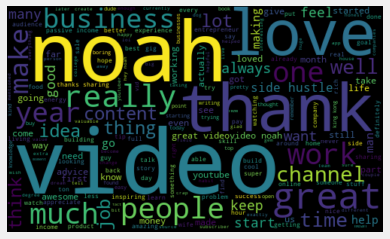

In [ ]:
# WordCloud
allWords = ' '.join( [cmts for cmts in data['clean_text']])
wordCloud = WordCloud(width = 500, height = 300, random_state = 21, max_font_size = 119).generate(allWords)

plt.imshow(wordCloud, interpolation= 'bilinear')
plt.axis('off')
plt.show

As noted from the above word cloud the most used words are Thank, video, SQL, course, link, zip file, tutorial, database, download. Most of these words are relatable to the content and suggest the in-depth skills that the learners desire to grow using the SQL tool. Thank being the dominant word suggests gratitude and high positive response.

**Is this true?**

The answer can be found by the code below:

> Indented block First, compute the Analysis:






In [ ]:
# function to compute analysis
def getAnalysis(score):
  if score < 0 :
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'

data['Analysis'] = data['Polarity'].apply(getAnalysis)
data.head()

,cid,text,time,author,votes,clean_text,clean_time,Subjectivity,Polarity,Analysis
0,UgzDDofmjsNpc0_aCmx4AaABAg,Can we all just take a moment to appreciate ho...,1 年前,Roll with Rory,163,take moment appreciate quickly noah gets point...,1 year ago,0.500000,0.333333,Positive
1,UgyAkXwpoWQvO-MmUu14AaABAg,"""What do most people have wrong about passive ...",1 年前,Pablo Gutierrez,111,people wrong passive income never passive,1 year ago,0.900000,-0.500000,Negative
2,Ugz-yeN0J6jqJNAhEF54AaABAg,"Really helpful, and great to hear someone bein...",1 年前,Susan Hill,4,really helpful great hear someone honest much ...,1 year ago,0.450000,0.400000,Positive
3,UgyI589GoSuMqEPji294AaABAg,I love how transparent Noah is! He's talking a...,1 年前,Iconic Ape,11,love transparent noah talking passive income t...,1 year ago,0.600000,0.500000,Positive
4,UgxQRvgBmV70hGPTRxJ4AaABAg,"Thank you Noah, as always a super useful video...",1 年前,Bo Skitsko - Stay Sore Fitness,2,thank noah always super useful video feels lik...,1 year ago,0.541667,0.308333,Positive


Compute the percentages of the analysis:

In [ ]:
# % Percentages:
pcomments = data[data.Analysis == 'Positive']
pcomments = pcomments['clean_text']

print('Positive: ' +str(round((pcomments.shape[0]/data.shape[0])*100, 1))+ '%')

ncomments = data[data.Analysis == 'Negative']
ncomments = ncomments['clean_text']

print('Negative: ' +str(round((ncomments.shape[0]/data.shape[0])*100, 1))+ '%')

nucomments = data[data.Analysis == 'Neutral']
nucomments = nucomments['clean_text']

print('Nuetral: ' +str(round((nucomments.shape[0]/data.shape[0])*100, 1))+ '%')

Positive: 81.6%
Negative: 7.5%
Nuetral: 10.9%


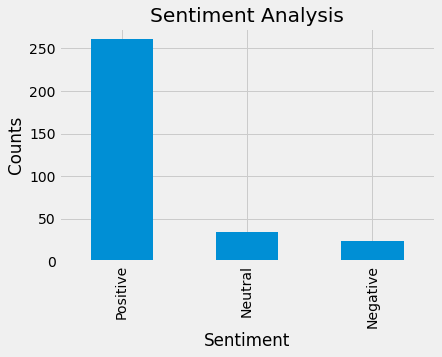

In [ ]:
# Value Count
data['Analysis'].value_counts

# Plot
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
data['Analysis'].value_counts().plot(kind= 'bar')
plt.show()

# Machine Learning

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(ngram_range = (2,2), 
                             min_df=0.01, 
                             max_df = 0.05).fit(data.clean_text)

In [ ]:
vectors = pd.DataFrame(vectorizer.transform(data.clean_text).toarray(),
                       columns = vectorizer.get_feature_names_out())
vectors.head()

,awesome video,feel like,feels like,get rich,great content,great job,hey noah,king kong,love video,love videos,...,side hustles,team making,thank much,thank noah,thanks noah,thanks sharing,thanks team,video great,video noah,would love
0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.474161,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.393744,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
sum_tfidf = vectors.sum(axis = 0)
sum_tfidf

awesome video         3.321074
feel like             3.141284
feels like            3.474161
get rich              4.731590
great content         6.396731
great job             4.694283
hey noah              4.694283
king kong             6.000000
love video            3.707107
love videos           3.146512
loved video           2.870151
noah thank            3.824991
one video             3.434177
passive income       10.518706
really appreciate     3.538659
really love           3.707107
rich quick            3.191543
side hustle           7.399272
side hustles          9.691075
team making           2.723599
thank much            5.816747
thank noah            9.345935
thanks noah           6.527578
thanks sharing        8.689678
thanks team           3.121320
video great           4.000000
video noah           12.255246
would love            3.497648
dtype: float64

In [ ]:
tfidf_list = [(word, sum_tfidf[word]) 
              for word, idx in vectorizer.vocabulary_.items() 
              if word in vectorizer.vocabulary_.keys() ]
tfidf_list

[('passive income', 10.518705871119),
 ('thank noah', 9.345935240202568),
 ('feels like', 3.474160976841304),
 ('video noah', 12.255245965547305),
 ('thanks team', 3.1213203435596424),
 ('team making', 2.7235992271718192),
 ('really appreciate', 3.5386589298986486),
 ('thanks noah', 6.52757756189211),
 ('great content', 6.396731412810102),
 ('great job', 4.694282626670221),
 ('loved video', 2.8701508697184104),
 ('thank much', 5.816747043004341),
 ('awesome video', 3.321074400019726),
 ('noah thank', 3.8249909540609095),
 ('really love', 3.7071067811865475),
 ('rich quick', 3.1915426635108526),
 ('get rich', 4.731589933113602),
 ('love video', 3.7071067811865475),
 ('thanks sharing', 8.6896782362372),
 ('video great', 4.0),
 ('side hustles', 9.691074786524977),
 ('love videos', 3.146511705874383),
 ('would love', 3.4976478801757627),
 ('hey noah', 4.694282626670221),
 ('feel like', 3.141284267337649),
 ('side hustle', 7.39927165223938),
 ('king kong', 6.0),
 ('one video', 3.43417748615

In [ ]:
sorted_tfidf_list =sorted(tfidf_list, key = lambda x: x[1], reverse=True)
sorted_tfidf_list

[('video noah', 12.255245965547305),
 ('passive income', 10.518705871119),
 ('side hustles', 9.691074786524977),
 ('thank noah', 9.345935240202568),
 ('thanks sharing', 8.6896782362372),
 ('side hustle', 7.39927165223938),
 ('thanks noah', 6.52757756189211),
 ('great content', 6.396731412810102),
 ('king kong', 6.0),
 ('thank much', 5.816747043004341),
 ('get rich', 4.731589933113602),
 ('great job', 4.694282626670221),
 ('hey noah', 4.694282626670221),
 ('video great', 4.0),
 ('noah thank', 3.8249909540609095),
 ('really love', 3.7071067811865475),
 ('love video', 3.7071067811865475),
 ('really appreciate', 3.5386589298986486),
 ('would love', 3.4976478801757627),
 ('feels like', 3.474160976841304),
 ('one video', 3.4341774861511016),
 ('awesome video', 3.321074400019726),
 ('rich quick', 3.1915426635108526),
 ('love videos', 3.146511705874383),
 ('feel like', 3.141284267337649),
 ('thanks team', 3.1213203435596424),
 ('loved video', 2.8701508697184104),
 ('team making', 2.72359922717

# Visualisation

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

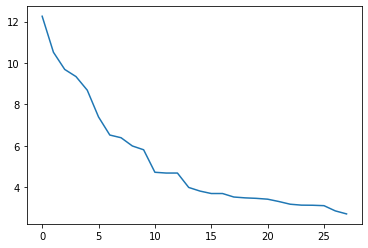

In [ ]:
word_list = []
word_name = []
for item in sorted_tfidf_list:
  word_list.append(item[1])
  word_name.append(item[0])
plt.plot(word_list)
plt.show()

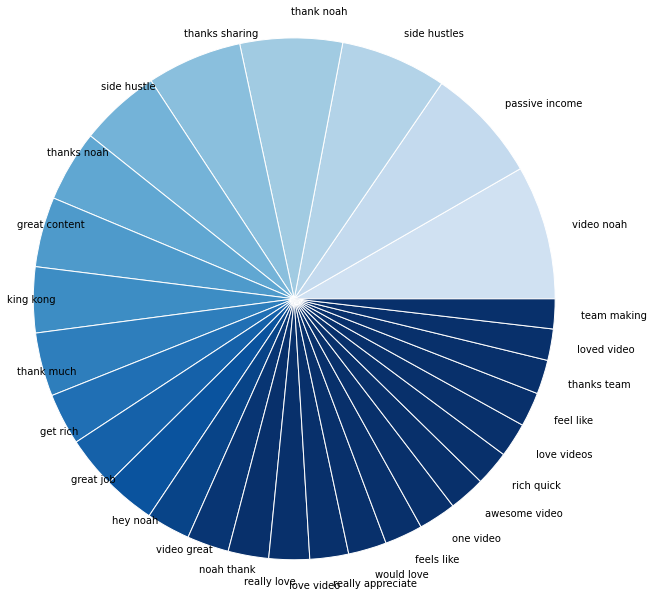

In [ ]:
# make data
x = word_list
colors = plt.get_cmap('Blues')(np.linspace(0.2, 1.7, len(x)))

# plot
fig, ax = plt.subplots()
ax.pie(x, colors=colors, radius=3, center=(4, 4),
       wedgeprops={"linewidth": 1, "edgecolor": "white"}, labels=word_name)

# ax.set(xlim=(0, 8), xticks=np.arange(1, 8),
#        ylim=(0, 8), yticks=np.arange(1, 8))

plt.show()

In [ ]:
df = pd.DataFrame(tfidf_list)
df_sorted = pd.DataFrame(sorted_tfidf_list)
  
# Printing Empty DataFrame
print(df)

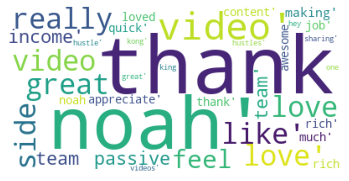

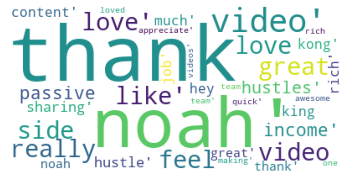

In [ ]:
from wordcloud import WordCloud
text = df[0].values
text_sorted = df_sorted[0].values

wordcloud = WordCloud(background_color='white',collocations=False).generate(str(text))
wordcloud_sorted = WordCloud(background_color='white',collocations=False).generate(str(text_sorted))

plt.imshow(wordcloud)
plt.axis("off")
plt.show()

plt.imshow(wordcloud_sorted)
plt.axis("off")
plt.show()